In [85]:
import csv

# Open the DATA file
with open('yeast.DATA', 'r') as data_file:
    data = data_file.read()

# Split the data into rows based on line breaks and columns based on tabs
rows = data.split('\n')
data_list = [row.split('\t') for row in rows]

# Define the output CSV file
csv_file = 'output.csv'

# Write the data to the CSV file
with open(csv_file, 'w', newline='') as csv_output:
    writer = csv.writer(csv_output)
    for row in data_list:
        writer.writerow(row)


In [2]:
import pandas as pd
df=pd.read_csv('output.csv')  #ignore the errors simply load your data here and the cell above
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'output.csv'

In [87]:
numeric_columns = df.columns[1:-1]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

df = df.dropna(subset=numeric_columns)   #drop rows with non-numeric values

df = df.reset_index(drop=True)

print(df)

     Sequence Name   mcg   gvh   alm   mit  erl  pox   vac   nuc Class
0       BAF1_YEAST  0.48  0.45  0.59  0.20  0.5  0.0  0.58  0.34   NUC
1       ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22   MIT
2       ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22   MIT
3       ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22   MIT
4       ACE2_YEAST  0.42  0.37  0.59  0.20  0.5  0.0  0.52  0.29   NUC
...            ...   ...   ...   ...   ...  ...  ...   ...   ...   ...
1479    YUR1_YEAST  0.81  0.62  0.43  0.17  0.5  0.0  0.53  0.22   ME2
1480    ZIP1_YEAST  0.47  0.43  0.61  0.40  0.5  0.0  0.48  0.47   NUC
1481    ZNRP_YEAST  0.67  0.57  0.36  0.19  0.5  0.0  0.56  0.22   ME2
1482    ZUO1_YEAST  0.43  0.40  0.60  0.16  0.5  0.0  0.53  0.39   NUC
1483    G6PD_YEAST  0.65  0.54  0.54  0.13  0.5  0.0  0.53  0.22   CYT

[1484 rows x 10 columns]


In [88]:
X=df.drop('Class',axis='columns')
y=df.Class

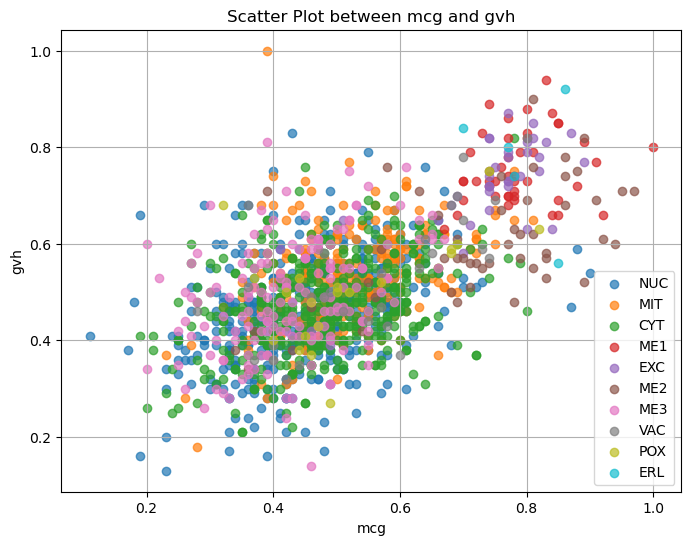

In [89]:
import matplotlib.pyplot as plt
x_feature = "mcg"
y_feature = "gvh"

# Create a scatter plot with different colors for different classes
classes =y.unique()

plt.figure(figsize=(8, 6))
for class_name in classes:
    subset = df[y == class_name]
    plt.scatter(subset[x_feature], subset[y_feature], label=class_name, alpha=0.7)

plt.title(f"Scatter Plot between {x_feature} and {y_feature}")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend()
plt.grid(True)

plt.show()

In [90]:
train=int(0.7*len(df))  #split into train and test
test=len(df)-train
X_train=X.iloc[:train]
y_train = y.iloc[:train]
X_test = X.iloc[train:]
y_test = y.iloc[train:]

In [109]:
X_test

,Sequence Name,mcg,gvh,alm,mit,erl,pox,vac,nuc
1038,SC25_YEAST,0.50,0.48,0.48,0.23,0.5,0.0,0.53,0.68
1039,SCJ1_YEAST,0.39,1.00,0.38,0.41,0.5,0.0,0.50,0.27
1040,PRCI_YEAST,0.56,0.42,0.52,0.14,0.5,0.0,0.51,0.22
1041,TAT2_YEAST,0.39,0.46,0.33,0.18,0.5,0.0,0.53,0.22
1042,SCO1_YEAST,0.52,0.54,0.47,0.49,0.5,0.0,0.54,0.22
...,...,...,...,...,...,...,...,...,...
1479,YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22
1480,ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47
1481,ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22
1482,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39


In [91]:
from math import sqrt
#calculate distance between test sample and the training sampeles 
def cal_distance(X1,X2):
    numeric_columns = X1.index[1:]
    #n_cols=len(numeric_columns)
    dis=0
    for n in  numeric_columns:
        dis+=(X1[n]-X2[n])**2
    return sqrt(dis)        
# def get_neighbors(train, test_row, num_neighbors):
#  distances = list()
#  for train_row in train:
#  dist = euclidean_distance(test_row, train_row)
#  distances.append((train_row, dist))
#  distances.sort(key=lambda tup: tup[1])
#  neighbors = list()
#  for i in range(num_neighbors):
#  neighbors.append(distances[i][0])
#  return neighbors

In [92]:
#get k nearest neighbours
def get_neighbours(train_rows,test_row,k):
    distances = []
    for _, row in train_rows.iterrows():
        dist = cal_distance(test_row, row)
        distances.append((row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbours = []
    for i in range(k):
        neighbours.append(distances[i][0])
    return neighbours

In [93]:
get_neighbours(X_train,X_test.iloc[1],5)

[Sequence Name    COX3_YEAST
 mcg                    0.52
 gvh                    0.77
 alm                    0.38
 mit                    0.34
 erl                     0.5
 pox                     0.0
 vac                    0.51
 nuc                    0.22
 Name: 205, dtype: object,
 Sequence Name    PPB_YEAST
 mcg                   0.39
 gvh                   0.81
 alm                   0.35
 mit                   0.28
 erl                    0.5
 pox                    0.0
 vac                   0.51
 nuc                   0.45
 Name: 778, dtype: object,
 Sequence Name    KTR3_YEAST
 mcg                    0.58
 gvh                    0.76
 alm                     0.4
 mit                    0.37
 erl                     0.5
 pox                     0.0
 vac                    0.54
 nuc                     0.3
 Name: 513, dtype: object,
 Sequence Name    CISY_YEAST
 mcg                    0.38
 gvh                    0.68
 alm                    0.44
 mit                    0.45


In [94]:
X_test.iloc[3]
# def predict_classification(train, test_row, num_neighbors):
#  neighbors = get_neighbors(train, test_row, num_neighbors)
#  output_values = [row[-1] for row in neighbors]
#  prediction = max(set(output_values), key=output_values.count)
#  return prediction

Sequence Name    TAT2_YEAST
mcg                    0.39
gvh                    0.46
alm                    0.33
mit                    0.18
erl                     0.5
pox                     0.0
vac                    0.53
nuc                    0.22
Name: 1041, dtype: object

In [95]:
from collections import Counter
#function to predict class of test sample
def predict_class(train_rows,y_train,test_row,k):
    neighbours=get_neighbours(train_rows,test_row,k)
    output_vals=y_train
    class_counts = Counter(output_vals)
    prediction = class_counts.most_common(1)[0][0]
    return prediction

In [116]:
predict_class(X_train,y_train,X_test.iloc[68],5)
# def k_nearest_neighbors(train, test, num_neighbors):
#  predictions = list()
#  for row in test:
#  output = predict_classification(train, row, num_neighbors)
#  predictions.append(output)
#  return(predictions)

'CYT'

In [97]:
#function to predict classes of all test samples
def knn(train,test,y_train,k):
    predictions=list()
    for _, row in test.iterrows():  # Iterate over rows of the test DataFrame
        output = predict_class(train, y_train, row, k)
        predictions.append(output)
    return predictions

In [110]:
ans=knn(X_train,X_test,y_train,3)

In [111]:
ans

['CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',
 'CYT',


In [103]:
len(ans)

446